In [1]:
import pandas as pd
import urllib.request


data = pd.read_csv('../../../news/scraping_result/en/2018_complement1/2018_complement1_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../../news/scraping_result/en/2018_complement1/2018_complement1_Cointelegraph.csv', encoding='UTF8',error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/en/2018_complement1/2018_complement2_Cointelegraph.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/en/2018_complement1/2018_complement1_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/en/2018_complement1/2018_complement1_Forbes.csv', error_bad_lines=False))



In [3]:
text = data[['main article']]
text['main article'] = text['main article'].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [4]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import csv
stopword_list =[]
f = open('../../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [15]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [16]:
article_contents = tokenized_doc.values.tolist()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [21]:
word2id = defaultdict(lambda: 0)

In [22]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [23]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [24]:
len(tf_idf_result)

15780

In [25]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

15780


In [26]:
sentences = article_contents

In [27]:
from gensim.models import Word2Vec

In [28]:
model = Word2Vec(sentences, min_count=1)

In [29]:
len(model.wv.vocab)

15780

In [30]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [31]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [32]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [33]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [34]:
temp_cluster_result['cluster'] = assigned_clusters

In [35]:
temp_cluster_result['raw_data'] = X.tolist()

In [36]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [37]:
from sklearn.metrics import pairwise_distances

In [38]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [39]:
len(cosine_centroid_list)

15780

In [40]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [41]:
sum(temp_distance[3])

2211.658738780939

In [42]:
import scipy.spatial.distance as dist

In [43]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0665577759805609

In [44]:
dist.euclidean(X[0],cosine_centroid_list[0])

4.365943843541701

In [45]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [46]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [47]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(30)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
506,"[0.19284552335739136, 0.6210806965827942, 0.08...",blockchain,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.135568,0.304108,0.831460,NaN
1267,"[0.2559620141983032, 0.6694037914276123, -0.01...",company,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.102573,0.153291,0.949282,NaN
453,"[0.45688626170158386, 0.6634681224822998, -0.0...",good,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.009879,0.043521,0.966358,NaN
1165,"[0.3266414999961853, 0.7202264070510864, -0.00...",business,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.037678,0.070113,0.967565,NaN
394,"[0.34886443614959717, 0.649683952331543, 0.021...",call,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.014366,0.042980,0.971386,NaN
585,"[0.5375974178314209, 0.6970512270927429, -0.10...",know,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.023826,0.048778,0.975048,NaN
701,"[0.34497836232185364, 0.5516939163208008, 0.07...",open,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.012219,0.036564,0.975654,NaN
1013,"[0.4513362646102905, 0.6665252447128296, 0.015...",order,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.013803,0.037260,0.976543,NaN
150,"[0.4420377016067505, 0.6872340440750122, -0.13...",part,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.010641,0.033627,0.977014,NaN
1369,"[0.34961771965026855, 0.7236567139625549, -0.0...",help,0,"[0.044818945, 0.077192225, -0.0031240145, 0.00...",0.021487,0.044294,0.977193,NaN


In [48]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 거래

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
31,"[0.6128943562507629, 0.555978000164032, 0.3139...",crypto,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.041593,0.247291,0.794302,NaN
8,"[0.5367787480354309, 0.42962098121643066, 0.20...",cryptocurrency,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.060191,0.157465,0.902725,NaN
111,"[0.7287800312042236, 0.5097108483314514, 0.647...",exchange,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.099928,0.170529,0.929399,NaN
735,"[0.4597247242927551, 0.39061781764030457, 0.20...",cryptocurrencies,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.049178,0.089053,0.960125,NaN
542,"[0.3172546327114105, 0.5971473455429077, 0.163...",include,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.028762,0.062770,0.965992,NaN
121,"[0.852567195892334, 0.3616940379142761, 0.5506...",trade,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.113682,0.140845,0.972837,NaN
153,"[0.7482228875160217, 0.6154516339302063, -0.01...",investor,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.074436,0.082327,0.992109,NaN
1944,"[0.561760663986206, 0.6200827956199646, 0.0123...",invest,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.026333,0.033859,0.992474,NaN
196,"[0.5085654258728027, 0.6296887397766113, 0.065...",risk,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.032118,0.037183,0.994935,NaN
314,"[0.5394137501716614, 0.673423171043396, -0.012...",consider,1,"[0.05682721, 0.07128035, 0.018596712, -0.01042...",0.021780,0.026206,0.995575,NaN


In [49]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(40)   # 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
215,"[0.5015232563018799, 0.6496237516403198, -0.10...",make,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.036386,0.118969,0.917417,NaN
98,"[0.5419070720672607, 0.6036393046379089, -0.03...",many,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.019700,0.056431,0.963269,NaN
560,"[0.4965977072715759, 0.6191805601119995, -0.17...",give,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.007652,0.043831,0.963822,NaN
198,"[0.5915529131889343, 0.6610239744186401, -0.25...",look,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.014725,0.041975,0.972750,NaN
308,"[0.4781440496444702, 0.5761114954948425, 0.097...",become,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.023285,0.048314,0.974971,NaN
36,"[0.5957865715026855, 0.7605724334716797, -0.41...",tell,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.020950,0.044758,0.976192,NaN
853,"[0.5020647644996643, 0.5645723342895508, -0.08...",interest,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.014273,0.036564,0.977709,NaN
4,"[0.5144519209861755, 0.6263346076011658, -0.27...",find,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.008804,0.030844,0.977960,NaN
343,"[0.4886016249656677, 0.6060640811920166, -0.11...",community,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.010716,0.031230,0.979485,NaN
418,"[0.5099248886108398, 0.5738378763198853, -0.00...",believe,2,"[0.06321719, 0.08082749, -0.02117718, 0.007362...",0.012084,0.031771,0.980312,NaN


In [50]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5,"[0.4734528064727783, 0.3505536615848541, 0.000...",bitcoin,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.139578,0.321192,0.818386,NaN
20,"[0.8773705959320068, 0.44704470038414, 0.01198...",market,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.074333,0.183516,0.890817,NaN
19,"[0.7621304392814636, 0.5792499780654907, -0.21...",time,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.041522,0.119046,0.922476,NaN
170,"[0.7345122694969177, 0.5513647198677063, -0.22...",move,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.009276,0.049783,0.959493,NaN
51,"[0.5546358823776245, 0.5859405994415283, -0.13...",first,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.023392,0.059214,0.964179,NaN
82,"[0.6523991227149963, 0.6038817763328552, -0.40...",accord,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.023770,0.059291,0.964479,NaN
247,"[0.637948751449585, 0.5792531967163086, -0.303...",come,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.028125,0.062306,0.965819,NaN
152,"[0.6782669425010681, 0.5196718573570251, -0.24...",term,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.006437,0.035405,0.971033,NaN
252,"[0.7595933675765991, 0.6184877157211304, -0.37...",follow,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.005753,0.033163,0.972590,NaN
512,"[0.674454391002655, 0.5840084552764893, -0.219...",remain,3,"[0.07902706, 0.06883273, -0.033451498, 0.01373...",0.002917,0.029839,0.973078,NaN


In [51]:
y_km = temp_cluster_result['cluster'].values

In [52]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

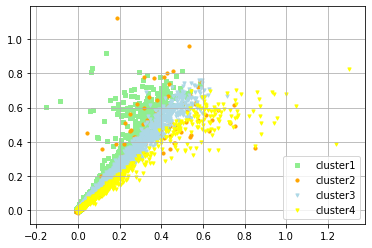

In [53]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [54]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 인플

3421

In [55]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 비즈 

880

In [56]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 협업

9701

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소

1778

In [58]:
# X[:,1]
from sklearn.cluster import AgglomerativeClustering
import numpy as np

agg = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="cosine")

assign = agg.fit_predict(X)
# assign = agg.fit(X)

In [59]:
len(assign)

15780

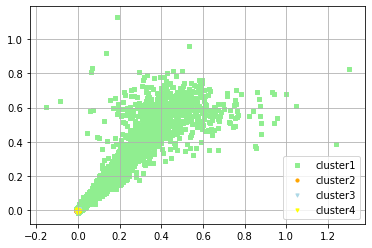

In [60]:
plt.scatter(X[assign==0,0],X[assign==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign==1,0],X[assign==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign==2,0],X[assign==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign==3,0],X[assign==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [61]:
assign

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
from scipy.cluster.hierarchy import dendrogram

In [63]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

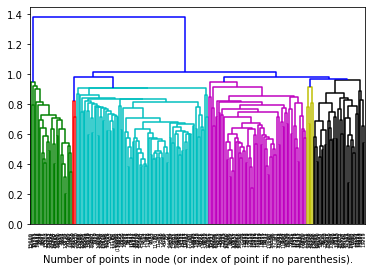

In [64]:

model1 = AgglomerativeClustering(linkage ="average", affinity="cosine", distance_threshold=0, n_clusters=None)

model1.fit(X)

plot_dendrogram(model1, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [65]:
temp_cluster_result0 = pd.DataFrame(columns=temp_heder)

In [66]:
temp_cluster_result0['word'] = list(model.wv.vocab)

In [67]:
temp_cluster_result0['cluster'] = assign

In [68]:
temp_cluster_result0['raw_data'] = X.tolist()

In [69]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X, assign)

temp_cluster_result0['centroid'] = temp_cluster_result0['cluster'].apply(lambda x : clf.centroids_[x])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [70]:
cosine_centroid_list0 = []
for cosine_centroid in temp_cluster_result0['centroid'] :
    cosine_centroid_list0.append(cosine_centroid.tolist())

In [71]:
temp_distance0 = pairwise_distances(X,cosine_centroid_list0, metric='cosine')

In [72]:
temp_cluster_result0['distance'] = temp_cluster_result0.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [73]:
temp_cluster_result0['tfidf'] = tf_idf_value
temp_cluster_result0['score'] = temp_cluster_result0.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [74]:
temp_cluster_result0[temp_cluster_result0['cluster']==0].sort_values(by=['score']).head(20)  # 비즈 , 투자, 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
215,"[0.5015232563018799, 0.6496237516403198, -0.10...",make,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.037509,0.118969,0.918540,NaN
31,"[0.6128943562507629, 0.555978000164032, 0.3139...",crypto,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.166402,0.247291,0.919111,NaN
5,"[0.4734528064727783, 0.3505536615848541, 0.000...",bitcoin,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.243812,0.321192,0.922620,NaN
506,"[0.19284552335739136, 0.6210806965827942, 0.08...",blockchain,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.241214,0.304108,0.937106,NaN
1267,"[0.2559620141983032, 0.6694037914276123, -0.01...",company,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.112113,0.153291,0.958822,NaN
98,"[0.5419070720672607, 0.6036393046379089, -0.03...",many,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.017957,0.056431,0.961527,NaN
560,"[0.4965977072715759, 0.6191805601119995, -0.17...",give,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.008733,0.043831,0.964902,NaN
308,"[0.4781440496444702, 0.5761114954948425, 0.097...",become,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.019672,0.048314,0.971358,NaN
198,"[0.5915529131889343, 0.6610239744186401, -0.25...",look,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.017176,0.041975,0.975201,NaN
853,"[0.5020647644996643, 0.5645723342895508, -0.08...",interest,0,"[0.06132863461971283, 0.07897284626960754, -0....",0.013435,0.036564,0.976871,NaN


In [75]:
temp_cluster_result0[temp_cluster_result0['cluster']==1].sort_values(by=['score']).head(20)  # 협업 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9752,"[-0.005637709517031908, -0.0007551222224719822...",trialling,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.079649,0.000232,1.079417,NaN
10697,"[-0.0013390496606007218, 0.004179374780505896,...",multinationals,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.158946,0.000155,1.158791,NaN
11208,"[-0.005516470409929752, 0.0009617427713237703,...",beginning,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.188381,0.000077,1.188303,NaN
5963,"[-0.007735210470855236, 0.003162657842040062, ...",enabler,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.190318,0.000387,1.189932,NaN
13235,"[-0.005138478707522154, 0.0016428068047389388,...",keystone,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.203315,0.000077,1.203238,NaN
10138,"[-0.008432048372924328, -0.0024510042276233435...",taxationukraine,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.227459,0.000077,1.227382,NaN
4691,"[-0.003169667674228549, 0.00031491107074543834...",renegade,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.231909,0.000077,1.231832,NaN
8999,"[-0.010653555393218994, -0.006233769468963146,...",mceneany,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.241436,0.000155,1.241282,NaN
9648,"[0.0006924764602445066, 0.00582884019240737, -...",earmark,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.245144,0.000077,1.245067,NaN
10873,"[-0.0055083357729017735, 0.0024122796021401882...",omnilayer,1,"[-0.0023856451734900475, 3.6308756534708664e-0...",0.263735,0.000077,1.263658,NaN


In [76]:
temp_cluster_result0[temp_cluster_result0['cluster']==2].sort_values(by=['score']).head(20)  # 투자 ICO 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8382,"[0.004392588976770639, 0.002486021723598242, 0...",launchthe,2,"[-0.0003067587676923722, -0.000599523016717284...",0.271936,0.000077,1.271859,NaN
4460,"[-0.0036957641132175922, -0.005610441323369741...",chiefly,2,"[-0.0003067587676923722, -0.000599523016717284...",0.340432,0.000077,1.340355,NaN
10059,"[0.0024217450991272926, 0.007591023109853268, ...",korelya,2,"[-0.0003067587676923722, -0.000599523016717284...",0.378570,0.000077,1.378492,NaN
14760,"[0.004325950518250465, -0.006307650823146105, ...",gettywhile,2,"[-0.0003067587676923722, -0.000599523016717284...",0.382125,0.000077,1.382047,NaN
13204,"[0.00560159282758832, 0.003523697843775153, 0....",pairings–purchasing,2,"[-0.0003067587676923722, -0.000599523016717284...",0.417274,0.000077,1.417196,NaN
15046,"[-0.004866091534495354, -0.0027204754296690226...",wook,2,"[-0.0003067587676923722, -0.000599523016717284...",0.418548,0.000077,1.418471,NaN
9618,"[-0.005287866573780775, -0.0007647289312444627...",ping,2,"[-0.0003067587676923722, -0.000599523016717284...",0.444116,0.000155,1.443961,NaN
12111,"[0.002780007431283593, 0.0010069527197629213, ...",quoine,2,"[-0.0003067587676923722, -0.000599523016717284...",0.448675,0.000077,1.448597,NaN
3339,"[-0.00312699843198061, 6.333828787319362e-05, ...",kiwi,2,"[-0.0003067587676923722, -0.000599523016717284...",0.466243,0.000077,1.466166,NaN
12062,"[0.001609224360436201, 0.00048672291450202465,...",dicos,2,"[-0.0003067587676923722, -0.000599523016717284...",0.478603,0.000077,1.478526,NaN


In [77]:
temp_cluster_result0[temp_cluster_result0['cluster']==3].sort_values(by=['score']).head(20)  #  채굴

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6794,"[-0.0006998508470132947, -0.009722700342535973...",indexas,3,"[-0.002016001846641302, -0.0032551330514252186...",0.144608,0.000077,1.144531,NaN
13810,"[-0.0028336914256215096, -0.009088373742997646...",upwork,3,"[-0.002016001846641302, -0.0032551330514252186...",0.176031,0.000077,1.175953,NaN
15303,"[0.0018712240271270275, -0.007833288051187992,...",unaired,3,"[-0.002016001846641302, -0.0032551330514252186...",0.283717,0.000077,1.283640,NaN
14955,"[-0.006856819614768028, -0.009201603941619396,...",feline,3,"[-0.002016001846641302, -0.0032551330514252186...",0.294262,0.000077,1.294185,NaN
5104,"[-3.363603900652379e-05, -0.001185888308100402...",antminer_official,3,"[-0.002016001846641302, -0.0032551330514252186...",0.308534,0.000077,1.308457,NaN
1427,"[0.0008915336220525205, -0.0011723529314622283...",sharkpool,3,"[-0.002016001846641302, -0.0032551330514252186...",0.312580,0.000077,1.312503,NaN
12404,"[-0.0014175527030602098, -0.007186277769505978...",chesnot,3,"[-0.002016001846641302, -0.0032551330514252186...",0.325182,0.000077,1.325104,NaN
901,"[-0.0023350270930677652, -0.007134511135518551...",writingslide,3,"[-0.002016001846641302, -0.0032551330514252186...",0.340647,0.000077,1.340570,NaN
15609,"[-0.004891023971140385, -0.004073852673172951,...",networkingsocial,3,"[-0.002016001846641302, -0.0032551330514252186...",0.376569,0.000077,1.376492,NaN
3453,"[-0.004625106696039438, 0.0015811240300536156,...",zuoxing,3,"[-0.002016001846641302, -0.0032551330514252186...",0.391183,0.000077,1.391105,NaN


In [78]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==0]) # 비즈, 투자, 긍정

15619

In [79]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==1]) # 협업

87

In [80]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==2]) # ICO

43

In [81]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==3]) # 채굴

31

In [82]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, assign, metric='cosine')

In [83]:
silhouette_score

0.82134753

In [ ]:
"""
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 12 #  가격, 거래소, 돈
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 9 # 기술발전
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈
"""

In [84]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [85]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [86]:
kmeans.inertia_

3378.30224609375

In [87]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 2 2 ... 0 0 0]


In [88]:
cluster_values= list(model.wv.vocab)

In [89]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-3378.30224609375


In [90]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [91]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7448394


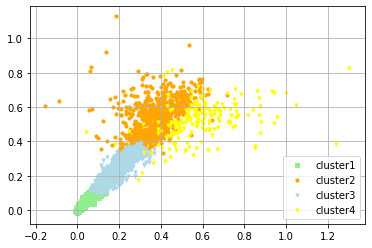

In [92]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [93]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [94]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [95]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [96]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [97]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [98]:
import scipy.spatial.distance as dist

In [99]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [100]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [101]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8595,"[0.019062040373682976, 0.022852476686239243, -...",aficionado,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.026906,0.000077,1.026829,NaN
15495,"[0.02176620438694954, 0.029648039489984512, -0...",andriy,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.026986,0.000155,1.026832,NaN
4024,"[0.0223418939858675, 0.02733764797449112, -0.0...",untenable,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.027049,0.000155,1.026895,NaN
11192,"[0.020879656076431274, 0.022656962275505066, -...",weiter,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.027275,0.000077,1.027198,NaN
12260,"[0.01688704639673233, 0.024971971288323402, -0...",wozniacki,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.027604,0.000077,1.027527,NaN
8093,"[0.018507467582821846, 0.024066410958766937, -...",emblazon,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.028092,0.000077,1.028015,NaN
9936,"[0.02089700475335121, 0.03122975118458271, -0....",alegal,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.028471,0.000077,1.028394,NaN
10678,"[0.020613932982087135, 0.03159138560295105, -0...",asahi,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.028553,0.000155,1.028398,NaN
3807,"[0.019063059240579605, 0.025486908853054047, -...",gokul,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.028721,0.000155,1.028566,NaN
15736,"[0.020577063784003258, 0.025728894397616386, -...",mikhail,0,"[0.020835105, 0.026967011, -0.006804266, 0.002...",0.028670,0.000077,1.028593,NaN


In [102]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(40,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
384,"[0.38109609484672546, 0.5365308523178101, -0.0...",identify,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.164145,0.010513,1.153632,NaN
1240,"[0.37031784653663635, 0.5128202438354492, -0.0...",outline,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.190049,0.007576,1.182473,NaN
1959,"[0.3770107626914978, 0.537426233291626, -0.081...",present,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.223776,0.009663,1.214113,NaN
1621,"[0.34170106053352356, 0.5014788508415222, -0.0...",structure,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.256625,0.008581,1.248044,NaN
2371,"[0.347973108291626, 0.5184512138366699, -0.099...",promote,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.260267,0.008890,1.251378,NaN
2508,"[0.35505956411361694, 0.5023881793022156, -0.0...",refer,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.266928,0.007576,1.259352,NaN
1198,"[0.38291558623313904, 0.5330976843833923, -0.1...",mind,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.291087,0.008658,1.282429,NaN
750,"[0.36056262254714966, 0.5430417656898499, -0.0...",introduce,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.315471,0.012214,1.303257,NaN
745,"[0.3976174592971802, 0.5147830843925476, -0.10...",whole,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.312681,0.009199,1.303482,NaN
1878,"[0.350941926240921, 0.4852255582809448, -0.048...",engage,1,"[0.36398274, 0.52602226, -0.06980895, 0.042793...",0.331142,0.007808,1.323335,NaN


In [103]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 제도,한계

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4126,"[0.16626526415348053, 0.2127431482076645, -0.0...",accusation,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.053542,0.001623,1.051919,NaN
3740,"[0.17053797841072083, 0.2081836313009262, -0.0...",overseas,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.061402,0.002164,1.059238,NaN
1246,"[0.16376422345638275, 0.20330218970775604, -0....",ignore,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.070503,0.002319,1.068184,NaN
6110,"[0.16581331193447113, 0.20921733975410461, -0....",dream,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.073912,0.001701,1.072212,NaN
4660,"[0.1558380424976349, 0.2053045630455017, -0.05...",attend,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.074273,0.001623,1.072649,NaN
6269,"[0.16360968351364136, 0.21347463130950928, -0....",premier,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.075437,0.001469,1.073969,NaN
7659,"[0.17019988596439362, 0.21569396555423737, -0....",gujarat,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.076084,0.001082,1.075001,NaN
1235,"[0.1706465184688568, 0.21179409325122833, -0.0...",forget,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.078634,0.001855,1.076779,NaN
3739,"[0.15933829545974731, 0.2030981034040451, -0.0...",elect,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.079356,0.001778,1.077578,NaN
938,"[0.16712316870689392, 0.20425672829151154, -0....",normal,2,"[0.16094604, 0.2055292, -0.048665233, 0.018444...",0.080992,0.001855,1.079137,NaN


In [104]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(30,'score') #  기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1029,"[0.6266990900039673, 0.5875940918922424, -0.28...",january,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.494243,0.013837,1.480406,NaN
544,"[0.5698607563972473, 0.5421574115753174, -0.17...",today,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.512913,0.030148,1.482765,NaN
986,"[0.5959433913230896, 0.5217563509941101, -0.14...",range,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.525865,0.015692,1.510172,NaN
222,"[0.5450373291969299, 0.45702603459358215, -0.1...",index,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.568641,0.010127,1.558514,NaN
307,"[0.59295254945755, 0.5960334539413452, -0.2249...",october,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.591844,0.018630,1.573215,NaN
241,"[0.6858698129653931, 0.5761340856552124, -0.21...",gain,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.649333,0.019789,1.629544,NaN
315,"[0.599948525428772, 0.5012381076812744, -0.146...",worth,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.670368,0.019944,1.650424,NaN
894,"[0.6057849526405334, 0.5925254225730896, -0.23...",close,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.677007,0.017702,1.659305,NaN
872,"[0.6542345285415649, 0.5795852541923523, -0.28...",begin,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.694096,0.031230,1.662866,NaN
303,"[0.6285828351974487, 0.5171444416046143, -0.28...",mark,3,"[0.5908139, 0.5248682, -0.15258256, 0.05925288...",0.721112,0.010900,1.710212,NaN


In [105]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 부정

12992

In [106]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 긍정

785

In [107]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 제도,한계

1819

In [108]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 기타

184

In [109]:
agg1 = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="euclidean")

assign1 = agg1.fit_predict(X)

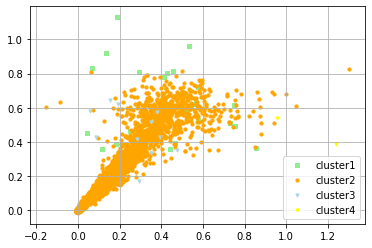

In [110]:
plt.scatter(X[assign1==0,0],X[assign1==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign1==1,0],X[assign1==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign1==2,0],X[assign1==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign1==3,0],X[assign1==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [111]:
temp_cluster_result2 = pd.DataFrame(columns=temp_heder)
temp_cluster_result2['word'] = list(model.wv.vocab)
temp_cluster_result2['cluster'] = assign1
temp_cluster_result2['raw_data'] = X.tolist()
clf1 = NearestCentroid()
clf1.fit(X, assign1)

NearestCentroid()

In [112]:
temp_cluster_result2['centroid'] = temp_cluster_result2['cluster'].apply(lambda x : clf1.centroids_[x])

In [113]:
euclidean_centroid_list2 = []
for euclidean_centroid in temp_cluster_result2['centroid'] :
    euclidean_centroid_list2.append(euclidean_centroid.tolist())

In [114]:

temp_distance2 = pairwise_distances(X,euclidean_centroid_list2, metric='euclidean')

In [115]:
temp_cluster_result2['distance'] = temp_cluster_result2.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [116]:
temp_cluster_result2['tfidf'] = tf_idf_value
temp_cluster_result2['score'] = temp_cluster_result2.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [117]:
temp_cluster_result2[temp_cluster_result2['cluster']==0].sort_values(by=['score']).head(20) # 투자 ,  거래 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
873,"[0.4519435167312622, 0.5863550305366516, 0.364...",back,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",1.112191,0.032003,2.080188,NaN
1944,"[0.561760663986206, 0.6200827956199646, 0.0123...",invest,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",1.769328,0.033859,2.735470,NaN
4708,"[0.44500595331192017, 0.5819955468177795, -0.0...",icos,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",1.763069,0.023036,2.740033,NaN
12,"[0.5781433582305908, 0.5277692675590515, 0.223...",hold,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",1.975178,0.051638,2.923540,NaN
153,"[0.7482228875160217, 0.6154516339302063, -0.01...",investor,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",2.113995,0.082327,3.031668,NaN
79,"[0.5782413482666016, 0.7233043909072876, -0.14...",investment,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",2.316573,0.060064,3.256509,NaN
1890,"[0.43044787645339966, 0.6081842184066772, -0.1...",raise,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",2.344013,0.028447,3.315566,NaN
521,"[0.4280378520488739, 0.8035699129104614, -0.18...",capital,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",2.427687,0.035173,3.392515,NaN
111,"[0.7287800312042236, 0.5097108483314514, 0.647...",exchange,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",2.579372,0.170529,3.408842,NaN
516,"[0.5684694647789001, 0.6326204538345337, 0.332...",dollar,0,"[0.4259815216064453, 0.6184639930725098, 0.316...",2.503576,0.042053,3.461523,NaN


In [118]:
temp_cluster_result2[temp_cluster_result2['cluster']==1].sort_values(by=['score']).head(20) #  부정, 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
11118,"[0.05916343256831169, 0.0738498792052269, -0.0...",sehr,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.032810,0.000155,1.032655,NaN
7195,"[0.06013868376612663, 0.07296054810285568, -0....",harmful,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.033810,0.000387,1.033424,NaN
6966,"[0.05756206437945366, 0.07876721769571304, -0....",motor,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.035406,0.000387,1.035019,NaN
11080,"[0.06409328430891037, 0.07619376480579376, -0....",werden,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.037013,0.000155,1.036859,NaN
11117,"[0.06638547778129578, 0.0818963572382927, -0.0...",anlage,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.038136,0.000155,1.037982,NaN
5609,"[0.06079889088869095, 0.0804196149110794, -0.0...",paulo,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.038908,0.000464,1.038444,NaN
7822,"[0.06655068695545197, 0.08517001569271088, -0....",cruise,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.039612,0.000541,1.039071,NaN
4227,"[0.060304589569568634, 0.07878122478723526, -0...",weed,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.039890,0.000464,1.039427,NaN
5680,"[0.06060924008488655, 0.07812570780515671, -0....",lamborghini,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.039856,0.000387,1.039470,NaN
10916,"[0.06323090940713882, 0.08395706117153168, -0....",recycle,1,"[0.05975394323468208, 0.07688093930482864, -0....",0.041505,0.000387,1.041119,NaN


In [119]:
temp_cluster_result2[temp_cluster_result2['cluster']==2].sort_values(by=['score']).head(20) # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1424,"[0.3497801721096039, 0.5172790884971619, -0.36...",block,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",2.069663,0.034632,3.035031,NaN
61,"[0.056709613651037216, 0.5827677249908447, -0....",network,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",2.525560,0.065939,3.459621,NaN
642,"[0.08874478936195374, 0.4304054081439972, 0.20...",transaction,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",2.738474,0.088821,3.649653,NaN
540,"[0.28567853569984436, 0.41901257634162903, -0....",mine,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",2.972135,0.069727,3.902408,NaN
1558,"[0.29138314723968506, 0.17368464171886444, 0.1...",ethereum,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",3.136493,0.058054,4.078439,NaN
925,"[0.3926949203014374, 0.42980867624282837, 0.25...",contract,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",3.164997,0.035636,4.129361,NaN
506,"[0.19284552335739136, 0.6210806965827942, 0.08...",blockchain,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",3.556364,0.304108,4.252256,NaN
1557,"[0.3791724145412445, 0.5743926167488098, 0.164...",smart,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",3.429989,0.029298,4.400692,NaN
5,"[0.4734528064727783, 0.3505536615848541, 0.000...",bitcoin,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",3.787984,0.321192,4.466792,NaN
74,"[0.3527689576148987, 0.33403074741363525, 0.16...",cash,2,"[0.2744464874267578, 0.4617486894130707, 0.014...",3.692187,0.039502,4.652685,NaN


In [120]:
temp_cluster_result2[temp_cluster_result2['cluster']==3].sort_values(by=['score']).head(20) # 가격 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
210,"[1.2389252185821533, 0.3863040804862976, -0.47...",price,3,"[1.0974879264831543, 0.4641955494880676, -0.44...",0.80659,0.109615,1.696975,NaN
6,"[0.9560506939888, 0.5420870184898376, -0.40536...",percent,3,"[1.0974879264831543, 0.4641955494880676, -0.44...",0.80659,0.078694,1.727896,NaN


In [121]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==0]) # 투자 거래 

28

In [122]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==1]) # 부정 이슈

15739

In [123]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==2]) # 기술

11

In [124]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==3]) # 가격

2

In [125]:
silhouette_score1 = metrics.silhouette_score(X, assign1, metric='euclidean')

In [126]:
silhouette_score1

0.84980977

In [ ]:
agg2 = AgglomerativeClustering(n_clusters=4, linkage ="ward", affinity="euclidean")

assign2 = agg2.fit_predict(X)

In [ ]:
plt.scatter(X[assign2==0,0],X[assign2==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign2==1,0],X[assign2==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign2==2,0],X[assign2==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign2==3,0],X[assign2==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
temp_cluster_result3 = pd.DataFrame(columns=temp_heder)
temp_cluster_result3['word'] = list(model.wv.vocab)
temp_cluster_result3['cluster'] = assign2
temp_cluster_result3['raw_data'] = X.tolist()
clf2 = NearestCentroid()
clf2.fit(X, assign2)

In [ ]:
temp_cluster_result3['centroid'] = temp_cluster_result3['cluster'].apply(lambda x : clf2.centroids_[x])

In [ ]:
euclidean_centroid_list3 = []
for euclidean_centroid in temp_cluster_result3['centroid'] :
    euclidean_centroid_list3.append(euclidean_centroid.tolist())

In [ ]:
temp_distance3 = pairwise_distances(X,euclidean_centroid_list3, metric='euclidean')

In [ ]:
temp_cluster_result3['distance'] = temp_cluster_result3.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

temp_cluster_result3['tfidf'] = tf_idf_value
temp_cluster_result3['score'] = temp_cluster_result3.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==0].sort_values(by=['score']).head(20)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==1].sort_values(by=['score']).head(20)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==2].sort_values(by=['score']).head(20)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==3].sort_values(by=['score']).head(20)

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==0])

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==1])

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==2])

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==3])

In [ ]:
silhouette_score3 = metrics.silhouette_score(X, assign2, metric='euclidean')

In [ ]:
silhouette_score3

In [ ]:

"""
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.7476496# 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.7476496
 """

In [ ]:
#temp_cluster_result1.to_csv("../cluster/en_news/2017_up2/en_news_2017_up2_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/en_news/2017_up2/en_news_2017_up2_cosine.csv")